# CSCI 547 / 747 – Advanced Algorithmic Trading
Spring 2020 - Homework 1

Student: Assem Kussainova

ID: 201535798

In this assignment I have implemented a python program that predicts the price of stocks using three different machine learning algorithms, called Long Short-Term Memory(LSTM), Support Vector Regression (SVR) and the other is Linear Regression.


Resources used for implementing algotihms: 


https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a


https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb

# LSTM

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use("fivethirtyeight")

Using TensorFlow backend.


For this example I will be using stock price data from a single stock, BHP. Result from the rest of the stock prices are submitted to the Google Form, you can see results there.

In [2]:
df = web.DataReader('BHP', data_source = 'yahoo', start = '2019-01-02', end = '2020-02-28')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,47.900002,46.450001,46.639999,47.860001,2003600.0,43.552387
2019-01-03,47.380001,46.299999,47.250000,46.389999,3951500.0,42.214691
2019-01-04,49.549999,47.860001,48.020000,49.220001,3996400.0,44.789982
2019-01-07,49.939999,49.099998,49.369999,49.480000,3078700.0,45.026581
2019-01-08,49.959999,49.189999,49.700001,49.330002,2907600.0,44.890083
2019-01-09,50.070000,49.380001,49.889999,49.599998,3829200.0,45.135780
2019-01-10,47.650002,47.020000,47.090000,47.540001,2124500.0,45.116798
2019-01-11,47.490002,47.060001,47.439999,47.200001,1729300.0,44.794132
2019-01-14,47.610001,46.849998,47.049999,47.139999,1824300.0,44.737186


Next, it is shown the number of rows and columns in the data set. The result shows that we have 292 rows or days the stock price was recorded, and 6 columns.

In [3]:
df.shape

(292, 6)

Create a graph to visualize the data.

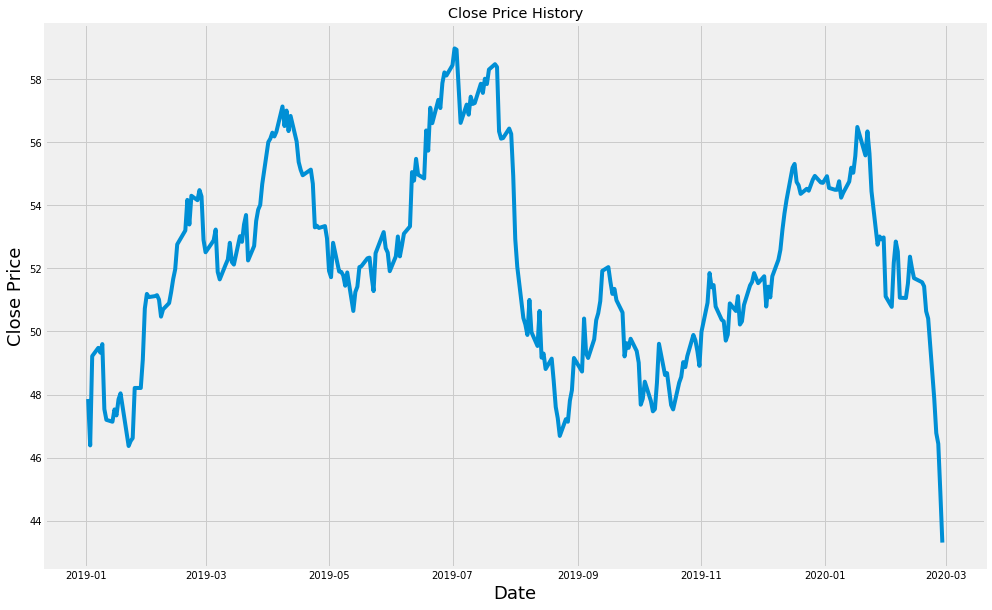

In [4]:
plt.figure(figsize=(15, 10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

Created a new data frame with only the closing price and converted it to an array. Then created a variable to store the length of the training data set. I decided the training data set to contain about 80% of the data.

In [5]:
data = df.filter(['Close'])
dataset = data.values
train_num = math.ceil(len(dataset) * 0.8)
train_num

234

Scaled the data set to be values between 0 and 1 inclusive, because it is needed to scale your data before giving it to the neural network.

In [6]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.29054912],
       [0.19667931],
       [0.37739463],
       [0.39399733],
       [0.38441893],
       [0.4016601 ],
       [0.27011492],
       [0.24840354],
       [0.24457203],
       [0.26947621],
       [0.25734348],
       [0.28991042],
       [0.3020434 ],
       [0.19540214],
       [0.20561925],
       [0.21136639],
       [0.31289896],
       [0.31289896],
       [0.37037033],
       [0.47381853],
       [0.50319268],
       [0.49680708],
       [0.49872271],
       [0.50063858],
       [0.49169841],
       [0.45721583],
       [0.4719029 ],
       [0.48467434],
       [0.50702418],
       [0.53320553],
       [0.55300127],
       [0.60344809],
       [0.63154531],
       [0.69348639],
       [0.64367804],
       [0.70178787],
       [0.69284793],
       [0.71328214],
       [0.7005107 ],
       [0.61238827],
       [0.58748385],
       [0.60536396],
       [0.61174956],
       [0.63346094],
       [0.5478926 ],
       [0.53256706],
       [0.56321838],
       [0.572

Created a training data set that contains the past 60 day closing price values that I want to use to predict the 61st closing price value. So the first column in the ‘x_train’ data set contain values from the data set from index 0 to index 59 (60 values total) and the second column contain values from the data set from index 1 to index 60 (60 values) and so on and so forth.

In [7]:
train_data = scaled_data[0:train_num, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

After the independent train data set ‘x_train’ and dependent train data set ‘y_train’ converted to numpy arrays so they can be used for training the LSTM model.

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

Next step is to reshape the data to be 3-dimensional in the form number of samples, number of time steps, and number of features. The LSTM model is expecting a 3-dimensional data set.

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(174, 60, 1)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective.The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not.


Built the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

Compile the model using the mean squared error (MSE) loss function and the adam optimizer.

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Train the model using the training data sets. Batch size is the total number of training examples present in a single batch, and epoch is the number of iterations when an entire data set is passed forward and backward through the neural network.

In [12]:
model.fit(x_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
174/174 [==============================] - 21s 120ms/step - loss: 0.0231
Epoch 2/10
174/174 [==============================] - 11s 62ms/step - loss: 0.0085 0s - loss: 
Epoch 3/10
174/174 [==============================] - 8s 46ms/step - loss: 0.0070
Epoch 4/10
174/174 [==============================] - 9s 49ms/step - loss: 0.0056
Epoch 5/10
174/174 [==============================] - 16s 90ms/step - loss: 0.0058
Epoch 6/10
174/174 [==============================] - 14s 83ms/step - loss: 0.0054
Epoch 7/10
174/174 [==============================] - 19s 107ms/step - loss: 0.0045
Epoch 8/10
174/174 [==============================] - 15s 84ms/step - loss: 0.0044
Epoch 9/10
174/174 [==============================] - 15s 89ms/step - loss: 0.0038
Epoch 10/10
174/174 [==============================] - 14s 79ms/step - loss: 0.0039


Create a test data set.

In [13]:
test_data = scaled_data[train_num - 60:, :]
x_test = []
y_test = dataset[train_num:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

Then convert the independent test data set ‘x_test’ to a numpy array so it can be used for testing the LSTM model.

In [14]:
x_test = np.array(x_test)

Reshape the data to be 3-dimensional in the form number of samples, number of time steps, and number of features. This needs to be done, because the LSTM model is expecting a 3-dimensional data set.

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Now get the predicted values from the model using the test data.

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Define the function MAPE to calculate the efficiency of the algorithm.

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mape = mean_absolute_percentage_error(y_test, predictions)
mape

2.1593078284479734

I want to test the model some more and get the predicted closing price value of BHP for March 2, 2020 (03/02/2020).

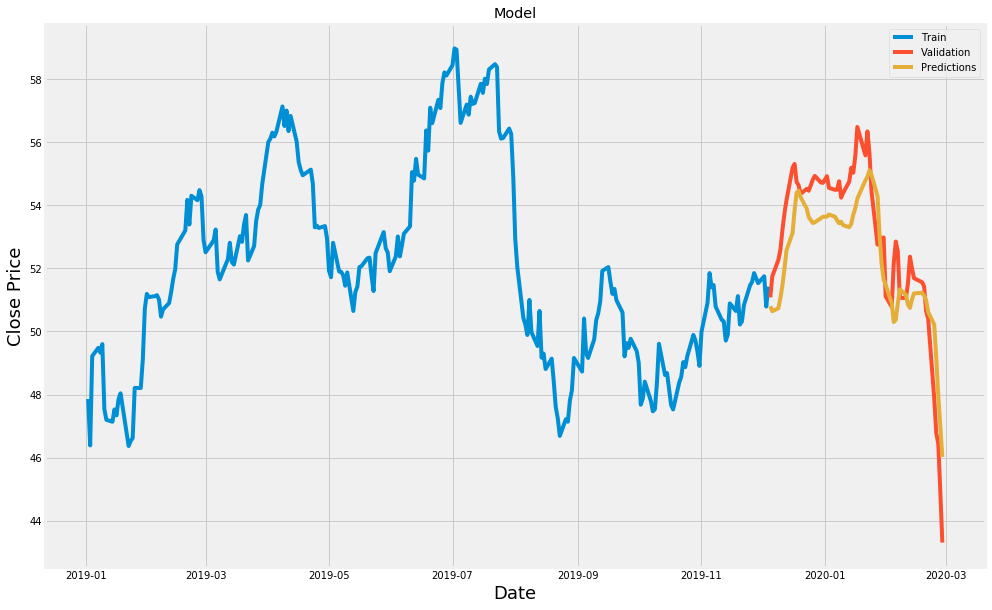

In [19]:
train = data[:train_num]
valid = data[train_num:]
valid['Predictions'] = predictions

plt.figure(figsize = (15, 10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lowerright')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2019-12-05,51.080002,50.797329
2019-12-06,51.750000,50.641670
2019-12-09,52.270000,50.739357
2019-12-10,52.590000,51.059780
2019-12-11,53.220001,51.467045
2019-12-12,53.740002,51.992939
2019-12-13,54.160000,52.570229
2019-12-16,55.189999,53.119411
2019-12-17,55.310001,53.838188


Finally, I input the data into the model and get the predicted price.

In [21]:
get_data = web.DataReader('BHP', data_source = 'yahoo', start = '2019-01-02', end = '2020-02-28')
new_df = get_data.filter(['Close'])
last_60 = new_df[-60:].values
scaled_60 = scaler.transform(last_60)

X_test = []
X_test.append(scaled_60)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[44.99055]]


# Linear Regression and SVR

Support Vector Machine Pros:


It is effective in high dimensional spaces.


It works well with clear margin of separation.


It is effective in cases where number of dimensions is greater than the number of samples.

Linear Regression Pros:


Simple to implement.


Used to predict numeric values.

In [24]:
import numpy as np
import pandas_datareader as web

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [26]:
df = web.DataReader('BHP', data_source = 'yahoo', start = '2019-01-02', end = '2020-02-28')
print(df.head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2019-01-02  47.900002  46.450001  46.639999  47.860001  2003600.0  43.552387
2019-01-03  47.380001  46.299999  47.250000  46.389999  3951500.0  42.214691
2019-01-04  49.549999  47.860001  48.020000  49.220001  3996400.0  44.789982
2019-01-07  49.939999  49.099998  49.369999  49.480000  3078700.0  45.026581
2019-01-08  49.959999  49.189999  49.700001  49.330002  2907600.0  44.890083


I only need the Close price, so I am getting data only from the column ‘Close’ and storing this back into the variable ‘df’.

In [27]:
df = df[['Close']]
print(df.head())

                Close
Date                 
2019-01-02  47.860001
2019-01-03  46.389999
2019-01-04  49.220001
2019-01-07  49.480000
2019-01-08  49.330002


Now , I’m creating a variable called forecast_out, to store the number of days (1 days) into the future that I want to predict.

In [28]:
forecast_out = 1
df['Prediction'] = df[['Close']].shift(-1)
print(df.tail())

                Close  Prediction
Date                             
2020-02-24  47.869999   46.779999
2020-02-25  46.779999   46.439999
2020-02-26  46.439999   44.919998
2020-02-27  44.919998   43.310001
2020-02-28  43.310001         NaN


Next, I want to create the independent data set (X). This is the data set that I will use to train the machine learning model(s). 

In [29]:
X = np.array(df.drop(['Prediction'], 1))
X = X[:-forecast_out]

I created the independent data set in the previous step, now I will create the dependent data set called ‘y’. This is the target data, the one that holds the future price predictions.

In [30]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

I can start creating and training the models ! First I will create and train the Support Vector Machine (Regression).

In [33]:
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
svr_rbf.fit(x_train, y_train)
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence:", svm_confidence)

svm confidence: 0.907394610626859


Next I will create & train the Linear Regression model.

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_confidence = lr.score(x_test, y_test)
print("lr confidence:", lr_confidence)

lr confidence: 0.9147873217770798


In [35]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
print(x_forecast)

[[43.31000137]]


Finally, I will print out the future price (next 1 day) predictions of BHP stock using the linear regression model, and then print out the BHP stock price predictions for the next 1 day of the support vector machine using the x_forecast data. 

In [36]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[43.41856231]


In [37]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[37.47714037]
